In [5]:
# Install yfinance using pip
!pip install yfinance

  Using cached yfinance-0.2.40-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 69.0 kB/s eta 0:00:43
     ---------------------------------------- 0.0/3.0 MB 69.0 kB/s eta 0:00:43
      --------------------------------------- 0.0/3.0 MB 81.9 kB

In [6]:
!pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [1]:
import hvplot.pandas

In [25]:
# Set display options to round to 2 decimal places
pd.options.display.float_format = "{:.2f}".format

In [2]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for S&P 500
stock_ticker = 'SPY'

# Download historical data for S&P 500 since 1980
stock_data = yf.download(stock_ticker, start='1980-01-01', end='2024-01-01')['Adj Close']

# Download historical data for 10-Year Treasury Bond from FRED
bond_data = web.DataReader('DGS10', 'fred', start='1980-01-01', end='2024-01-01')



ModuleNotFoundError: No module named 'yfinance'

In [ ]:
# Resample bond data to match the frequency of stock data (daily) and forward fill missing values
#bond_data = bond_data.resample('D').ffill()

# Calculate the daily returns for both stock and bond data
stock_returns = stock_data.pct_change().dropna()
bond_returns = bond_data.pct_change().dropna()



In [ ]:
returns

In [ ]:
# Combine the data into a single DataFrame
returns = pd.merge(pd.DataFrame(stock_returns), bond_returns, left_index=True, right_index=True)
returns.rename(columns={'Adj Close': 'SP500', 'DGS10': '10Y_Treasury'}, inplace=True)



In [ ]:
# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SP500'].rolling(window=700).corr(returns['10Y_Treasury'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs 10Y Treasury)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and 10-Year Treasury Bond')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbols for S&P 500 and AGG
tickers = ['SPY', 'AGG']

# Download historical data since 1980
data = yf.download(tickers, start='1980-01-01', end='2024-01-01')['Adj Close']

# Calculate the daily returns
returns = data.pct_change().dropna()

# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SPY'].rolling(window=500).corr(returns['AGG'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs AGG)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and AGG')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Import yfinance library
import yfinance as yf
import pandas as pd

# Define the start and end dates  
start_date = '2024-04-01'
end_date   = '2024-05-01'

# Define the list of tickers
tickers = ['AAPL', 'MSFT']

# Download historical prices for the list of tickers
historical_prices = yf.download(tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-04-01  169.799698  423.805573  170.029999  424.570007  171.250000   
2024-04-02  168.611298  420.681213  168.839996  421.440002  169.339996   
2024-04-03  169.420197  419.692993  169.649994  420.450012  170.679993   
2024-04-04  168.591339  417.127625  168.820007  417.880005  171.919998   
2024-04-05  169.350296  424.753845  169.580002  425.519989  170.389999   

Price                          Low                    Open              \
Ticker            MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2024-04-01  427.890015  169.479996  422.220001  171.190002  423.950012   
2024-04-02  422.380005  168.229996  417.839996  169.080002  420.109985   
2024-04-03  423.260010  168.580002  419.089996  168.789993  419.730011   
2024-04-04  428.670013  168.820007  417.570007  170.289993  424.989990   
2024-04-05  426.510010  168.949997  418.320007  169.589996  420.010010   

Price         Volume            
Ticker          AAPL      MSFT  
Date                            
2024-04-01  46240500  16316000  
2024-04-02  49329500  17912000  
2024-04-03  47691700  16502300  
2024-04-04  53704400  19370900  
2024-04-05  42055200  16544300

In [8]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [9]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [10]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [11]:
new_sp500_tickers = []
for ticker in sp500_tickers:
    if '.B' not in sp500_tickers:
        new_sp500_tickers.append(ticker)
sp500_tickers = new_sp500_tickers

In [12]:
# Import yfinance library
import yfinance as yf
import pandas as pd

# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  500 of 500 completed


Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.5322 NaN 0.8450  NaN  NaN 8.3714 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2068 NaN 0.7737  NaN  NaN 8.1322 1.2708 NaN 14.9094 26.8926   
2000-01-05   37.7128 NaN 0.7851  NaN  NaN 8.1173 1.3889 NaN 15.2042 27.2852   
2000-01-06   36.2768 NaN 0.7171  NaN  NaN 8.4013 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.2999 NaN 0.7511  NaN  NaN 8.4910 1.4514 NaN 16.0730 27.2852   

Price       ... Volume                                                    \
Ticker      ...    WTW       WY WYNN      XEL       XOM XYL      YUM ZBH   
Date        ...                                                            
2000-01-03  ...    NaN   973700  NaN  2738600  13458200 NaN  3033493 NaN   
2000-01-04  ...    NaN  1201700  NaN   425200  14510800 NaN  3315031 NaN   
2000-01-05  ...    NaN  1184600  NaN   500200  17485000 NaN  4642602 NaN   
2000-01-06  ...    NaN  1307700  NaN   344100  19461600 NaN  3947658 NaN   
2000-01-07  ...    NaN  1728000  NaN   469500  16603800 NaN  6063647 NaN   

Price                    
Ticker         ZBRA ZTS  
Date                     
2000-01-03  1055700 NaN  
2000-01-04   522450 NaN  
2000-01-05   612225 NaN  
2000-01-06   263925 NaN  
2000-01-07   333900 NaN  

[5 rows x 3000 columns]

In [13]:
# Backup to prevent having to pull again
#historical_prices_backup = historical_prices
#historical_prices = historical_prices_backup

In [14]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6120 entries, 2000-01-03 to 2024-04-30
Columns: 3000 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2647), int64(353)
memory usage: 140.1 MB


In [15]:
historical_prices.loc['2024-04-01':'2024-04-02'].head()

Price      Adj Close                                                      \
Ticker             A     AAL     AAPL     ABBV     ABNB      ABT    ACGL   
Date                                                                       
2024-04-01  145.2904 15.4100 169.7997 179.0875 163.3700 111.5368 92.3100   
2024-04-02  143.9029 14.4000 168.6113 179.0181 160.1100 111.4672 91.4900   

Price                                  ...      Volume                        \
Ticker          ACN     ADBE      ADI  ...         WTW       WY         WYNN   
Date                                   ...                                     
2024-04-01 337.8618 502.0900 195.8410  ... 318300.0000  2203000 2954200.0000   
2024-04-02 335.1622 499.2100 194.1079  ... 622400.0000  3464200 1716000.0000   

Price                                                                     \
Ticker          XEL       XOM          XYL      YUM          ZBH    ZBRA   
Date                                                                       
2024-04-01  4266600  13817000  716800.0000  2227600  745000.0000  416900   
2024-04-02  4561600  19919600 1144400.0000  1987400 1057000.0000  461500   

Price                    
Ticker              ZTS  
Date                     
2024-04-01 1896500.0000  
2024-04-02 2391500.0000  

[2 rows x 3000 columns]

In [16]:
historical_prices.loc['2024-04'].head()

Price      Adj Close                                                      \
Ticker             A     AAL     AAPL     ABBV     ABNB      ABT    ACGL   
Date                                                                       
2024-04-01  145.2904 15.4100 169.7997 179.0875 163.3700 111.5368 92.3100   
2024-04-02  143.9029 14.4000 168.6113 179.0181 160.1100 111.4672 91.4900   
2024-04-03  143.4637 14.1600 169.4202 175.6892 159.3400 110.7308 92.2300   
2024-04-04  141.0782 13.8300 168.5913 166.3465 158.8400 109.5666 91.0900   
2024-04-05  143.8530 13.7600 169.3503 168.4271 161.7700 110.6512 94.9000   

Price                                  ...      Volume                        \
Ticker          ACN     ADBE      ADI  ...         WTW       WY         WYNN   
Date                                   ...                                     
2024-04-01 337.8618 502.0900 195.8410  ... 318300.0000  2203000 2954200.0000   
2024-04-02 335.1622 499.2100 194.1079  ... 622400.0000  3464200 1716000.0000   
2024-04-03 330.9984 497.0100 194.5860  ... 449700.0000  3122100 1321500.0000   
2024-04-04 329.1953 487.1100 191.1895  ... 350800.0000  3143500 2412000.0000   
2024-04-05 331.7156 485.1200 193.9884  ... 439700.0000  2662500 1437600.0000   

Price                                                                     \
Ticker          XEL       XOM          XYL      YUM          ZBH    ZBRA   
Date                                                                       
2024-04-01  4266600  13817000  716800.0000  2227600  745000.0000  416900   
2024-04-02  4561600  19919600 1144400.0000  1987400 1057000.0000  461500   
2024-04-03  4122600  16504300 1147300.0000  1543800 1369900.0000  399300   
2024-04-04  7021900  18467400 1129500.0000  2640400 1032900.0000  390700   
2024-04-05  4483900  21714100  753600.0000  1735600  791700.0000  216700   

Price                    
Ticker              ZTS  
Date                     
2024-04-01 1896500.0000  
2024-04-02 2391500.0000  
2024-04-03 2481200.0000  
2024-04-04 4306100.0000  
2024-04-05 3663900.0000  

[5 rows x 3000 columns]

In [17]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.5322 NaN 0.8450  NaN  NaN 8.3714 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2068 NaN 0.7737  NaN  NaN 8.1322 1.2708 NaN 14.9094 26.8926   
2000-01-05   37.7128 NaN 0.7851  NaN  NaN 8.1173 1.3889 NaN 15.2042 27.2852   
2000-01-06   36.2768 NaN 0.7171  NaN  NaN 8.4013 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.2999 NaN 0.7511  NaN  NaN 8.4910 1.4514 NaN 16.0730 27.2852   

Price       ...                                                             
Ticker      ... WTW      WY WYNN    XEL     XOM XYL    YUM ZBH    ZBRA ZTS  
Date        ...                                                             
2000-01-03  ... NaN 11.4279  NaN 6.9076 18.1810 NaN 4.6574 NaN 25.0278 NaN  
2000-01-04  ... NaN 10.9986  NaN 7.0667 17.8328 NaN 4.5638 NaN 24.6667 NaN  
2000-01-05  ... NaN 11.5812  NaN 7.3394 18.8050 NaN 4.5872 NaN 25.1389 NaN  
2000-01-06  ... NaN 12.1230  NaN 7.2712 19.7771 NaN 4.5482 NaN 23.7778 NaN  
2000-01-07  ... NaN 11.7243  NaN 7.2712 19.7191 NaN 4.4468 NaN 23.5139 NaN  

[5 rows x 500 columns]

In [18]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.5322,NaN,0.8450,NaN,NaN,8.3714,1.2778,NaN,16.2747,28.3256,...,NaN,11.4279,NaN,6.9076,18.1810,NaN,4.6574,NaN,25.0278,NaN
2000-01-04,40.2068,NaN,0.7737,NaN,NaN,8.1322,1.2708,NaN,14.9094,26.8926,...,NaN,10.9986,NaN,7.0667,17.8328,NaN,4.5638,NaN,24.6667,NaN
2000-01-05,37.7128,NaN,0.7851,NaN,NaN,8.1173,1.3889,NaN,15.2042,27.2852,...,NaN,11.5812,NaN,7.3394,18.8050,NaN,4.5872,NaN,25.1389,NaN
2000-01-06,36.2768,NaN,0.7171,NaN,NaN,8.4013,1.3750,NaN,15.3283,26.5393,...,NaN,12.1230,NaN,7.2712,19.7771,NaN,4.5482,NaN,23.7778,NaN
2000-01-07,39.2999,NaN,0.7511,NaN,NaN,8.4910,1.4514,NaN,16.0730,27.2852,...,NaN,11.7243,NaN,7.2712,19.7191,NaN,4.4468,NaN,23.5139,NaN


In [19]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100

# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

Ticker
A       6120
AAL     4679
AAPL    6120
ABBV    2851
ABNB     851
        ... 
XYL     3156
YUM     6120
ZBH     5727
ZBRA    6120
ZTS     2830
Length: 500, dtype: int64

In [20]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=498)

In [28]:
historical_prices

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.53,NaN,0.84,NaN,NaN,8.37,1.28,NaN,16.27,28.33,...,NaN,11.43,NaN,6.91,18.18,NaN,4.66,NaN,25.03,NaN
2000-01-04,40.21,NaN,0.77,NaN,NaN,8.13,1.27,NaN,14.91,26.89,...,NaN,11.00,NaN,7.07,17.83,NaN,4.56,NaN,24.67,NaN
2000-01-05,37.71,NaN,0.79,NaN,NaN,8.12,1.39,NaN,15.20,27.29,...,NaN,11.58,NaN,7.34,18.80,NaN,4.59,NaN,25.14,NaN
2000-01-06,36.28,NaN,0.72,NaN,NaN,8.40,1.38,NaN,15.33,26.54,...,NaN,12.12,NaN,7.27,19.78,NaN,4.55,NaN,23.78,NaN
2000-01-07,39.30,NaN,0.75,NaN,NaN,8.49,1.45,NaN,16.07,27.29,...,NaN,11.72,NaN,7.27,19.72,NaN,4.45,NaN,23.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,137.24,13.92,168.79,167.80,162.84,106.89,93.19,313.54,477.12,195.72,...,263.60,31.33,96.81,54.77,120.07,130.33,141.12,120.90,277.53,150.88
2024-04-25,136.12,14.13,169.66,167.29,163.01,106.86,93.05,309.00,473.44,197.16,...,256.06,31.25,96.35,54.46,120.35,130.27,140.87,119.48,292.53,153.36
2024-04-26,137.48,13.88,169.07,159.62,164.23,107.53,90.90,308.01,477.56,201.17,...,250.11,30.84,95.63,53.42,117.01,132.05,141.08,119.09,297.21,158.42


In [22]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [23]:
# Create a function called 'computingReturns' that takes  prices and a list of integers (momentums) as an input
def computingReturns(prices, list_of_momentums): 
    '''
    Takes as an input a dataframe of prices and a list of momentums 
    and returns a dataframe with returns over the momentum list and 1 day forward returns
    '''

    # Return the total returns DataFrame
    return total_returns


In [24]:
prices = historical_prices
list_of_momentums = [1,2]

In [27]:
historical_prices.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.53,NaN,0.84,NaN,NaN,8.37,1.28,NaN,16.27,28.33,...,NaN,11.43,NaN,6.91,18.18,NaN,4.66,NaN,25.03,NaN
2000-01-04,40.21,NaN,0.77,NaN,NaN,8.13,1.27,NaN,14.91,26.89,...,NaN,11.00,NaN,7.07,17.83,NaN,4.56,NaN,24.67,NaN
2000-01-05,37.71,NaN,0.79,NaN,NaN,8.12,1.39,NaN,15.20,27.29,...,NaN,11.58,NaN,7.34,18.80,NaN,4.59,NaN,25.14,NaN
2000-01-06,36.28,NaN,0.72,NaN,NaN,8.40,1.38,NaN,15.33,26.54,...,NaN,12.12,NaN,7.27,19.78,NaN,4.55,NaN,23.78,NaN
2000-01-07,39.30,NaN,0.75,NaN,NaN,8.49,1.45,NaN,16.07,27.29,...,NaN,11.72,NaN,7.27,19.72,NaN,4.45,NaN,23.51,NaN


In [33]:
# Initialize the forecast horizon
forecast_horizon = 1
# Compute forward returns by taking percentage change of close prices
f_returns = prices.pct_change(forecast_horizon, fill_method=None)
f_returns.iloc[:,0:10].head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.08,NaN,-0.08,NaN,NaN,-0.03,-0.01,NaN,-0.08,-0.05
2000-01-05,-0.06,NaN,0.01,NaN,NaN,-0.00,0.09,NaN,0.02,0.01
2000-01-06,-0.04,NaN,-0.09,NaN,NaN,0.03,-0.01,NaN,0.01,-0.03
2000-01-07,0.08,NaN,0.05,NaN,NaN,0.01,0.06,NaN,0.05,0.03


In [30]:
f_returns[['AAPL']].head()

Ticker,AAPL
Date,
2000-01-03,NaN
2000-01-04,-0.08
2000-01-05,0.01
2000-01-06,-0.09
2000-01-07,0.05


In [31]:
prices[['AAPL']].head()

Ticker,AAPL
Date,
2000-01-03,0.84
2000-01-04,0.77
2000-01-05,0.79
2000-01-06,0.72
2000-01-07,0.75


In [76]:
(168.611298-169.799698)/169.799698

-0.006998834591566832

In [35]:
# We then shift the forward returns
f_returns = f_returns.shift(-forecast_horizon)
f_returns.iloc[:,0:10].head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI
Date,,,,,,,,,,
2000-01-03,-0.06,NaN,0.01,NaN,NaN,-0.00,0.09,NaN,0.02,0.01
2000-01-04,-0.04,NaN,-0.09,NaN,NaN,0.03,-0.01,NaN,0.01,-0.03
2000-01-05,0.08,NaN,0.05,NaN,NaN,0.01,0.06,NaN,0.05,0.03
2000-01-06,0.06,NaN,-0.02,NaN,NaN,-0.01,0.03,NaN,0.04,0.09
2000-01-07,-0.01,NaN,-0.05,NaN,NaN,-0.01,0.01,NaN,-0.07,-0.04


In [36]:
# Pivot the dataframe
f_returns = pd.DataFrame(f_returns.unstack())
# Name the column based on the forecast horizon
name = "F_" + str(forecast_horizon) + "_d_returns"
f_returns.rename(columns={0: name}, inplace=True)
f_returns.head()

F_1_d_returns
Ticker Date                     
A      2000-01-03          -0.06
       2000-01-04          -0.04
       2000-01-05           0.08
       2000-01-06           0.06
       2000-01-07          -0.01

In [37]:
# Initialize total_returns with forward returns
total_returns = f_returns

In [38]:
total_returns.shape

(3047760, 1)

In [39]:
list_of_momentums = [1,2]

In [40]:
# Iterate over the list of momentum values
for i in list_of_momentums:   
    # Compute returns for each momentum value
    feature = prices.pct_change(i)
    feature = pd.DataFrame(feature.unstack())
    # Name the column based on the momentum value
    name = str(i) + "_d_returns"        
    feature.rename(columns={0: name}, inplace=True)
    # Rename columns and reset index
    feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
    # Merge computed feature returns with total_returns based on Ticker and Date
    total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')

total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-03          -0.06          NaN          NaN
       2000-01-04          -0.04        -0.08          NaN
       2000-01-05           0.08        -0.06        -0.13
       2000-01-06           0.06        -0.04        -0.10
       2000-01-07          -0.01         0.08         0.04

In [41]:
# Drop rows with any NaN values
total_returns.dropna(axis=0, how='any', inplace=True) 
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-05           0.08        -0.06        -0.13
       2000-01-06           0.06        -0.04        -0.10
       2000-01-07          -0.01         0.08         0.04
       2000-01-10          -0.02         0.06         0.15
       2000-01-11           0.02        -0.01         0.05

In [27]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

In [28]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1,2]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-05      -0.038077    -0.062030    -0.133680
       2000-01-06       0.083334    -0.038077    -0.097745
       2000-01-07       0.060577     0.083334     0.042084
       2000-01-10      -0.013599     0.060577     0.148959
       2000-01-11      -0.020220    -0.013599     0.046154

In [29]:
total_returns = total_returns.filter(items=['F_1_d_returns', '1_d_returns'])
total_returns.head()

F_1_d_returns  1_d_returns
Ticker Date                                  
A      2000-01-05      -0.038077    -0.062030
       2000-01-06       0.083334    -0.038077
       2000-01-07       0.060577     0.083334
       2000-01-10      -0.013599     0.060577
       2000-01-11      -0.020220    -0.013599

In [30]:
total_returns.index.get_level_values('Ticker').nunique()

499

In [31]:
total_returns.index.get_level_values('Date').value_counts().describe()

count    6117.000000
mean      443.947523
std        44.142832
min       355.000000
25%       409.000000
50%       449.000000
75%       485.000000
max       499.000000
Name: count, dtype: float64

In [32]:
# How many tickers do we have at each date?
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

Date
2024-04-29    499
2023-12-07    499
2023-12-18    499
2023-12-15    499
2023-12-14    499
             ... 
2000-01-26    355
2000-01-27    355
2000-01-28    355
2000-01-31    355
2000-01-05    355
Name: count, Length: 6117, dtype: int64

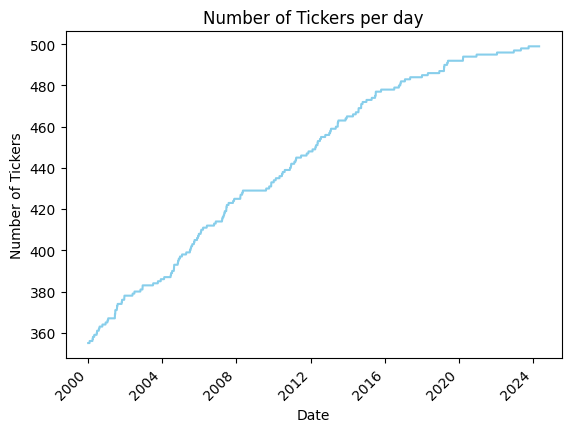

In [33]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [34]:
pd.options.display.float_format = "{:,.4f}".format

In [35]:
total_returns.describe()

,F_1_d_returns,1_d_returns
count,"2,715,627.0000","2,715,627.0000"
mean,0.0007,0.0007
std,0.0235,0.0235
min,-0.6805,-0.6805
25%,-0.0090,-0.0090
50%,0.0006,0.0006
75%,0.0102,0.0103
max,1.0236,1.0236


In [171]:
0.0007 * 252

0.1764

In [172]:
import numpy as np

In [173]:
np.sqrt(252)*  	0.0235 

0.3730509348601073

In [87]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns = pd.DataFrame((daily_mean[['SP&500']]+1).cumprod())

In [88]:
cum_returns.head()

,SP&500
Date,
2000-01-05,1.0058
2000-01-06,1.0329
2000-01-07,1.0427
2000-01-10,1.0329
2000-01-11,1.0303


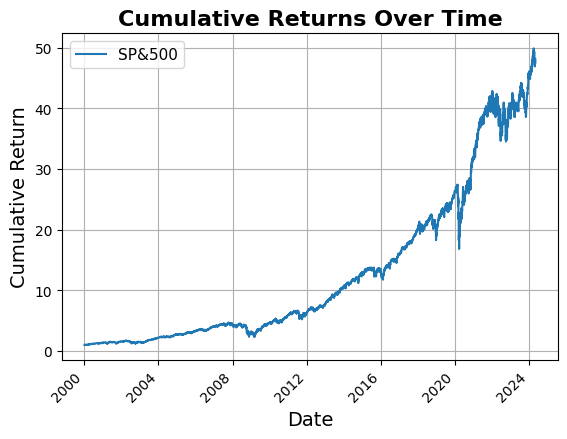

In [89]:
# Plotting the cumulative returns
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [90]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

In [91]:
ending_value    = cum_returns['SP&500'].iloc[-1]
beginning_value = cum_returns['SP&500'].iloc[1]

In [92]:
# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

The CAGR is: 17.08%


In [93]:
daily_mean[['SP&500']].describe()

,SP&500
count,"6,117.0000"
mean,0.0007
std,0.0129
min,-0.1272
25%,-0.0048
50%,0.0011
75%,0.0067
max,0.1148


In [94]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [95]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.88


In [96]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean[['SP&500']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).year).last())

In [97]:
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date]   (SP&500)

In [98]:
# Create a function to calculate RSI
def calculate_rsi(prices, window=14):
    
    return rsi

In [725]:
returns = total_returns[total_returns.index.get_level_values('Ticker')=='AAPL'][['1_d_returns']]
window = 6

In [726]:
delta = prices.diff()
delta.head()

1_d_returns
Ticker Date                   
A      2000-01-03          NaN
       2000-01-04      -3.3315
       2000-01-05      -2.4987
       2000-01-06      -1.4386
       2000-01-07       3.0287

In [727]:
gain = returns[returns>0].dropna().rolling(window=window).mean()
gain.rename(columns={returns.columns[0]:'gain'}, inplace=True)
gain.head(7)

gain
Ticker Date             
AAPL   2000-01-05    NaN
       2000-01-07    NaN
       2000-01-13    NaN
       2000-01-14    NaN
       2000-01-18    NaN
       2000-01-19 0.0450
       2000-01-20 0.0534

In [728]:
loss = returns[returns<0].dropna().rolling(window=window).mean()
loss.rename(columns={returns.columns[0]:'loss'}, inplace=True)
loss.head(7)

loss
Ticker Date              
AAPL   2000-01-06     NaN
       2000-01-10     NaN
       2000-01-11     NaN
       2000-01-12     NaN
       2000-01-21     NaN
       2000-01-24 -0.0467
       2000-01-26 -0.0353

In [729]:
returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')
returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
returns.head(15)

1_d_returns   gain    loss
Ticker Date                                  
AAPL   2000-01-05       0.0146    NaN     NaN
       2000-01-06      -0.0865    NaN     NaN
       2000-01-07       0.0474    NaN     NaN
       2000-01-10      -0.0176    NaN     NaN
       2000-01-11      -0.0512    NaN     NaN
       2000-01-12      -0.0600    NaN     NaN
       2000-01-13       0.1097    NaN     NaN
       2000-01-14       0.0381    NaN     NaN
       2000-01-18       0.0348    NaN     NaN
       2000-01-19       0.0253 0.0450     NaN
       2000-01-20       0.0651 0.0534     NaN
       2000-01-21      -0.0193    NaN     NaN
       2000-01-24      -0.0455    NaN -0.0467
       2000-01-25       0.0565 0.0549     NaN
       2000-01-26      -0.0184    NaN -0.0353

In [697]:
returns = returns.ffill().dropna()
returns.head()

Ticker,AAPL,gain,loss
Date,,,
2000-01-21,0.8403,0.0388,-0.0414
2000-01-24,0.8020,0.0388,-0.0359
2000-01-25,0.8473,0.0407,-0.0359
2000-01-26,0.8318,0.0407,-0.0272
2000-01-27,0.8304,0.0407,-0.0252


In [698]:
ratio = returns['gain']/abs(returns['loss'])
rsi = 100 - (100 / (1 + ratio))

In [54]:
# Create a function to calculate RSI using returns
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()    
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()    
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')    
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [55]:
# Create a function to calculate RSI using prices
def calculate_rsi(prices, window=14):    
    gain = prices[prices>0].dropna().rolling(window=window).mean()
    #gain.rename(columns={prices.columns[0]:'gain'}, inplace=True)
    gain.name = 'gain'
    loss = prices[prices<0].dropna().rolling(window=window).mean()
    #loss.rename(columns={prices.columns[0]:'loss'}, inplace=True)
    loss.name = 'loss'
    prices = pd.merge(prices, gain, left_index=True, right_index=True, how='left')
    prices = pd.merge(prices, loss, left_index=True, right_index=True, how='left')
    prices = prices.ffill()
    prices.dropna(inplace=True)
    ratio = prices['gain']/abs(prices['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [56]:
prices = pd.DataFrame(historical_prices.unstack())
prices.rename(columns={0:'1_d_returns'}, inplace=True)
prices.head()

1_d_returns
Ticker Date                   
A      2000-01-03      43.6130
       2000-01-04      40.2815
       2000-01-05      37.7828
       2000-01-06      36.3442
       2000-01-07      39.3729

In [57]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [741]:
total_returns[['RSI']].describe()

,RSI
count,2692758.0000
mean,50.9748
std,8.4170
min,8.0071
25%,45.2498
50%,50.9506
75%,56.6624
max,89.2620


In [625]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


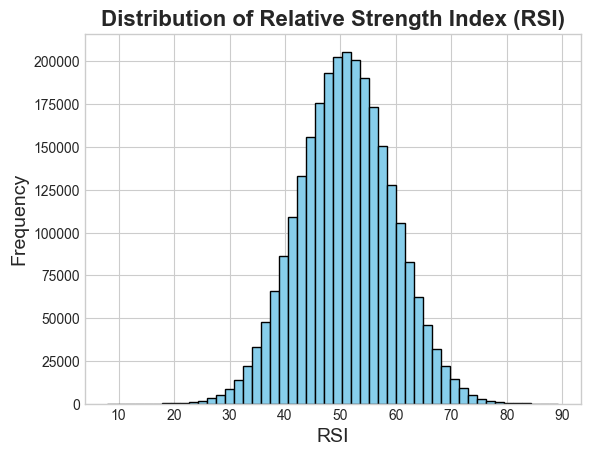

In [742]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)  # Turn off gridlines for histograms

# Displaying the plot
plt.show()

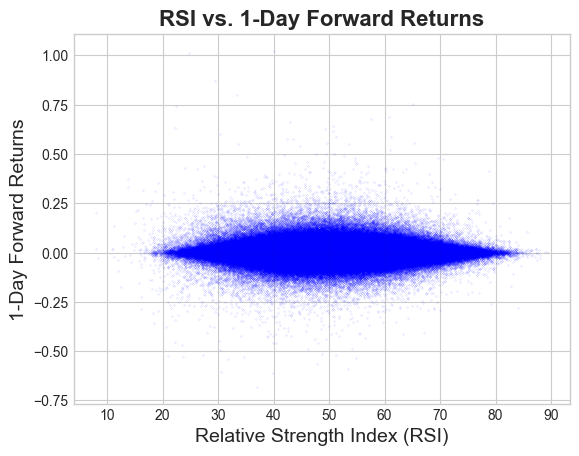

In [743]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)

# Displaying the plot
#plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [744]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

,F_1_d_returns,RSI
F_1_d_returns,1.000000,-0.004193
RSI,-0.004193,1.000000


<Axes: xlabel='Quantiles'>

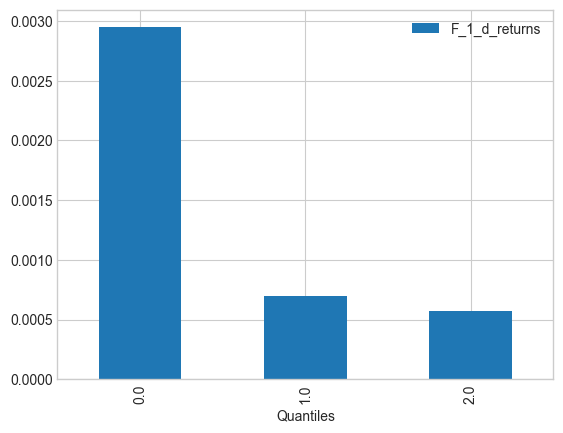

In [745]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

In [631]:
total_returns[total_returns['RSI']<30].describe()

,F_1_d_returns,1_d_returns,RSI,Quantiles,Position,Realized_Ret,RSI_Return
count,15909.0000,15909.0000,15909.0000,15909.0000,15909.0000,15909.0000,15909.0000
mean,0.0029,-0.0153,27.2697,0.0000,1.0000,0.0029,0.0029
std,0.0442,0.0491,2.5304,0.0000,0.0000,0.0442,0.0442
min,-0.5314,-0.6805,8.0071,0.0000,1.0000,-0.5314,-0.5314
25%,-0.0102,-0.0203,26.1460,0.0000,1.0000,-0.0102,-0.0102
50%,0.0014,-0.0021,28.0188,0.0000,1.0000,0.0014,0.0014
75%,0.0136,0.0055,29.1698,0.0000,1.0000,0.0136,0.0136
max,1.0101,0.3510,29.9995,0.0000,1.0000,1.0101,1.0101


In [59]:
model_name = "RSI"

In [99]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns[model_name].transform(trading_strategy)
# Create Returns for each Trade
total_returns[f'{model_name}_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 

# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

ann_returns = (pd.DataFrame((daily_mean[f'{model_name}_Return']+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100


calendar_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

In [105]:
total_returns[total_returns['Position']==1][['F_1_d_returns']].describe()

,F_1_d_returns
count,"15,920.0000"
mean,0.0030
std,0.0442
min,-0.5314
25%,-0.0102
50%,0.0014
75%,0.0136
max,1.0101


In [106]:
trades = total_returns[total_returns['Position']==1]
tickers_per_date =trades.index.get_level_values('Date').value_counts()
tickers_per_date.describe()

count   4,559.0000
mean        3.4920
std         5.1254
min         1.0000
25%         1.0000
50%         2.0000
75%         4.0000
max       111.0000
Name: count, dtype: float64

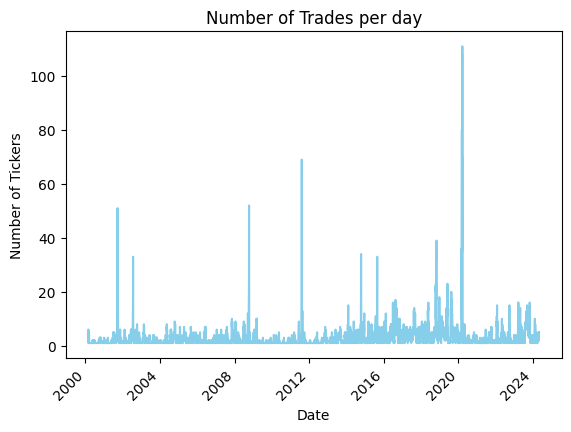

In [107]:
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Trades per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

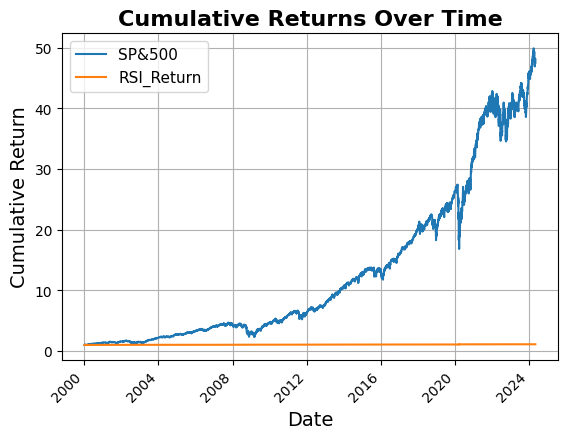

In [108]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

:Bars   [Date,Variable]   (value)

In [775]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_data['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_data['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()


In [776]:
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

,Metric,Value
0,Accuracy,0.4866
1,Precision,0.5300
2,Recall,0.0061


In [779]:
# Count the number of each class
counts = total_returns['y_test'].value_counts()

# Calculate the share of each class
total = counts.sum()
shares = counts / total * 100
shares

y_test
1   51.3791
0   48.6209
Name: count, dtype: float64

In [113]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 60:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns[model_name].transform(trading_strategy)
# Create Returns for each Trade
total_returns[f'{model_name}_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 


In [114]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Position  RSI_Return
Ticker Date                                                             
A      2000-01-05        -0.0381      -0.0620  NaN         0     -0.0000
       2000-01-06         0.0833      -0.0381  NaN         0      0.0000
       2000-01-07         0.0606       0.0833  NaN         0      0.0000
       2000-01-10        -0.0136       0.0606  NaN         0     -0.0000
       2000-01-11        -0.0202      -0.0136  NaN         0     -0.0000

In [115]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
        

# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

ann_returns = (pd.DataFrame((daily_mean[f'{model_name}_Return']+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100


calendar_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

The CAGR is: 14.98%
Sharpe Ratio of Strategy: 0.84


:Bars   [Date,Variable]   (value)

<Axes: xlabel='Date'>

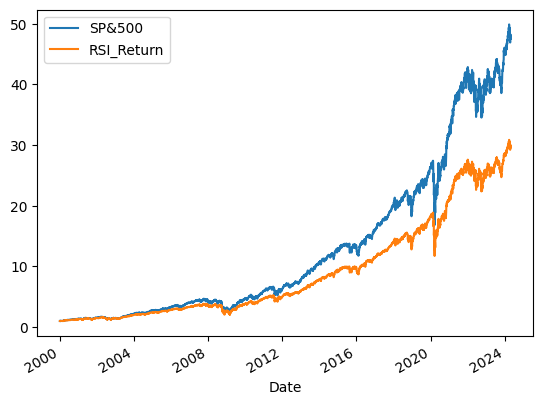

In [117]:
cum_returns.plot()

In [818]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Quantiles  Position  \
Ticker Date                                                               
A      2000-01-05        -0.0381      -0.0620  NaN        NaN         0   
       2000-01-06         0.0833      -0.0381  NaN        NaN         0   
       2000-01-07         0.0606       0.0833  NaN        NaN         0   
       2000-01-10        -0.0136       0.0606  NaN        NaN         0   
       2000-01-11        -0.0202      -0.0136  NaN        NaN         0   

                   RSI_Return  y  y_pred  y_test  
Ticker Date                                       
A      2000-01-05     -0.0000  0       0       0  
       2000-01-06      0.0000  1       0       1  
       2000-01-07      0.0000  1       0       1  
       2000-01-10     -0.0000  0       0       0  
       2000-01-11     -0.0000  0       0       0

In [829]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_returns['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_returns['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

,Metric,Value
0,Accuracy,0.5125
1,Precision,0.5154
2,Recall,0.8541
